# California Current Shapefile Map

This notebook creates a map of the California Current Large Marine Ecosystem (LME #3).

**Prerequisites:**
- Run `python scripts/01_download_data.py` first to download the shapefile

**Objectives:**
- Load California Current shapefile from data/raw/shapefiles
- Inspect the shapefile
- Create a map showing the California Current boundary
- Save the map to figures directory

## 1. Setup and Imports

In [1]:
# Import libraries
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from pathlib import Path

%matplotlib inline

In [2]:
# Set up paths
data_dir = Path('../data/raw/shapefiles')
figures_dir = Path('../figures')

# Ensure directories exist
data_dir.mkdir(parents=True, exist_ok=True)
figures_dir.mkdir(parents=True, exist_ok=True)

## 2. Load California Current Shapefile

The California Current is designated as Large Marine Ecosystem (LME) #3.
The shapefile should already be downloaded using `scripts/01_download_data.py`.

In [3]:
# Load California Current shapefile
shapefile_path = data_dir / 'california_current_lme.shp'

if not shapefile_path.exists():
    print("ERROR: Shapefile not found!")
    print(f"Expected location: {shapefile_path}")
    print("\nPlease run the download script first:")
    print("  python scripts/01_download_data.py")
    raise FileNotFoundError(f"Shapefile not found: {shapefile_path}")

print(f"Loading shapefile: {shapefile_path}")
california_current = gpd.read_file(shapefile_path)

print(f"Loaded {len(california_current)} feature(s)")
print(f"CRS: {california_current.crs}")

Loading shapefile: ../data/raw/shapefiles/california_current_lme.shp
Loaded 1 feature(s)
CRS: EPSG:4326


## 3. Inspect Shapefile

## 4. Create Map

Create a map showing the California Current boundary with geographic context.


Figure saved to: ../figures/california_current_map.png


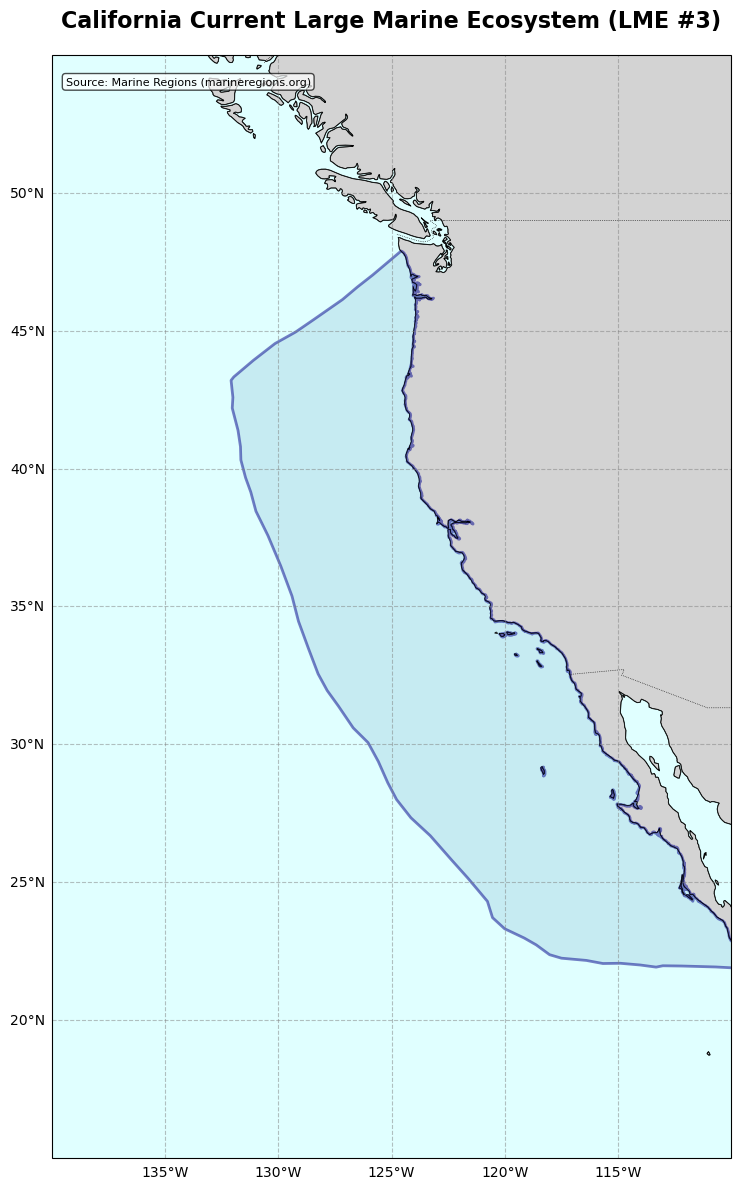

In [4]:
# Create figure with cartopy projection
fig, ax = plt.subplots(figsize=(12, 12),
                       subplot_kw={'projection': ccrs.PlateCarree()})

# Plot California Current boundary
california_current.plot(ax=ax, 
                       facecolor='lightblue', 
                       edgecolor='darkblue', 
                       alpha=0.5,
                       linewidth=2)

# Add geographic features
ax.add_feature(cfeature.LAND, facecolor='lightgray', edgecolor='black')
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5)
ax.add_feature(cfeature.OCEAN, facecolor='lightcyan')

# Add gridlines with labels
gl = ax.gridlines(draw_labels=True, linestyle='--', alpha=0.5, color='gray')
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 10}
gl.ylabel_style = {'size': 10}

# Set extent to focus on California Current region
# Approximate bounds: 20-50°N, 115-135°W
ax.set_extent([-140, -110, 15, 55], crs=ccrs.PlateCarree())

# Add title
ax.set_title('California Current Large Marine Ecosystem (LME #3)', 
            fontsize=16, fontweight='bold', pad=20)

# Add text annotation
ax.text(0.02, 0.98, 'Source: Marine Regions (marineregions.org)',
       transform=ax.transAxes, fontsize=8, verticalalignment='top',
       bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

plt.tight_layout()

# Save figure
output_file = figures_dir / 'california_current_map.png'
plt.savefig(output_file, dpi=300, bbox_inches='tight')
print(f"\nFigure saved to: {output_file}")

plt.show()

# Display California Current LME information
california_current.head()